In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Sequential vs Functional

In [2]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(16, 3, activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(2))
model.add(tf.keras.layers.Conv2D(8, 3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2))
model.add(tf.keras.layers.Conv2D(8, 3, activation='relu'))
model.add(tf.keras.layers.Conv2D(1, 3, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 8)           584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 1)           73        
Total params: 1,977
Trainable params: 1,977
Non-trainable params: 0
______________________________________________________

In [3]:
input_obj = tf.keras.layers.Input(shape=(28,28,1))
x = tf.keras.layers.Conv2D(16, 3, activation='relu')(input_obj)
x = tf.keras.layers.MaxPooling2D(2)(x)
x = tf.keras.layers.Conv2D(8, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)
x = tf.keras.layers.Conv2D(8, 3, activation='relu')(x)
output = tf.keras.layers.Conv2D(1, 3, activation='sigmoid')(x)

model = tf.keras.Model(input_obj, output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 8)         1160      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 8)           584       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 1, 1, 1)           73    

# Data Loading

In [4]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
print(x_train.shape, x_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


# Dense Autoencoder

Based on https://blog.keras.io/building-autoencoders-in-keras.html

In [6]:
encoding_dim = 32 # this is the size of our encoded representations

# Build the end-to-end model
input_img = tf.keras.layers.Input(shape=(784,))
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = tf.keras.Model(input_img, decoded)

# Point to the encoder model
encoder = tf.keras.Model(input_img, encoded)

# Point to the decoder model
encoded_input = tf.keras.layers.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = tf.keras.Model(encoded_input, decoder_layer(encoded_input))

# NOTE - using an intentionally high learning rate to speed up training,
#        may not be optimal
optimizer = tf.keras.optimizers.Adadelta(learning_rate=1e-1)
autoencoder.compile(optimizer=optimizer, loss='binary_crossentropy')

autoencoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Flatten images
X_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
X_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [7]:
# Train 
history = autoencoder.fit(X_train, X_train,
                          epochs=200,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(X_test, X_test))

Epoch 1/200
235/235 [==============================] - 2s 9ms/step - loss: 0.6803 - val_loss: 0.6508
Epoch 2/200
235/235 [==============================] - 2s 9ms/step - loss: 0.5401 - val_loss: 0.3990
Epoch 3/200
235/235 [==============================] - 2s 9ms/step - loss: 0.3369 - val_loss: 0.3012
Epoch 4/200
235/235 [==============================] - 2s 9ms/step - loss: 0.2932 - val_loss: 0.2854
Epoch 5/200
235/235 [==============================] - 2s 9ms/step - loss: 0.2834 - val_loss: 0.2798
Epoch 6/200
235/235 [==============================] - 2s 9ms/step - loss: 0.2792 - val_loss: 0.2768
Epoch 7/200
235/235 [==============================] - 2s 9ms/step - loss: 0.2766 - val_loss: 0.2747
Epoch 8/200
235/235 [==============================] - 2s 9ms/step - loss: 0.2747 - val_loss: 0.2731
Epoch 9/200
235/235 [==============================] - 2s 9ms/step - loss: 0.2731 - val_loss: 0.2717
Epoch 10/200
235/235 [==============================] - 2s 9ms/step - loss: 0.2717 - val_lo

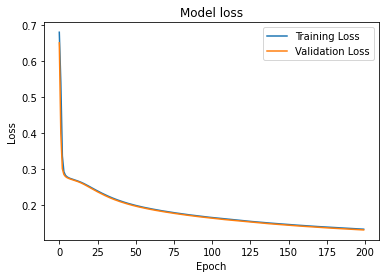

In [8]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

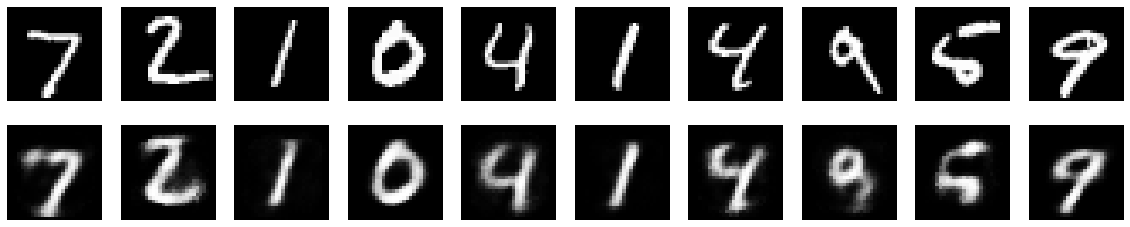

In [9]:
# Encode and decode some digits
decoded_imgs = autoencoder.predict(X_test)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

plt.show()

# Convolutional Autoencoder

In [11]:
input_img = tf.keras.Input(shape=(28, 28, 1))

x = tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D(2, padding='same')(x)
x = tf.keras.layers.Conv2D(8, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D(2, padding='same')(x)
x = tf.keras.layers.Conv2D(8, 3, activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D(2, padding='same')(x)

x = tf.keras.layers.Conv2D(8, 3, activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D(2)(x)
x = tf.keras.layers.Conv2D(8, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D(2)(x)
x = tf.keras.layers.Conv2D(16, 3, activation='relu')(x)
x = tf.keras.layers.UpSampling2D(2)(x)
decoded = tf.keras.layers.Conv2D(1, 3, activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.Model(input_img, decoded)

# NOTE - using an intentionally high learning rate to speed up training,
#        may not be optimal
optimizer = tf.keras.optimizers.Adadelta(learning_rate=1e-1)
autoencoder.compile(optimizer=optimizer, loss='binary_crossentropy')

autoencoder.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 8)           0   

In [0]:
# Expand the channel dimension to 1
X_train = x_train[..., np.newaxis]
X_test = x_test[..., np.newaxis]

In [0]:
history = autoencoder.fit(X_train, X_train,
                          epochs=25,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(X_test, X_test))

In [0]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

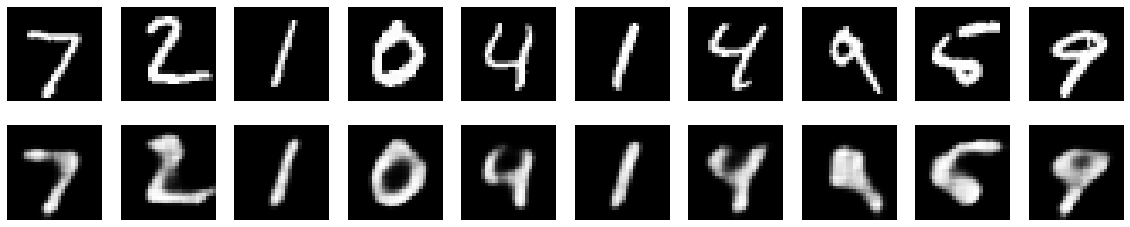

In [17]:
decoded_imgs = autoencoder.predict(X_test)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

plt.show()

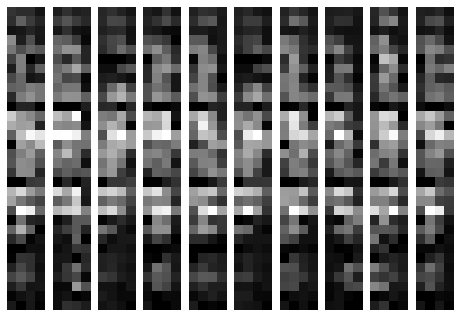

In [18]:
encoder = tf.keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(X_test)

n = 10
plt.figure(figsize=(8, 6))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    ax.imshow(encoded_imgs[i].reshape(4, 4 * 8).T, cmap='gray')
    ax.axis('off')
plt.show()